# Chapter 4: Search in Complex Environments


## 4.1: Local Search and Optimization Problems

**Local search** algorithms don't keep track of the path traveled nor states reached. Some characteristics:
- (-) Not systematic (may not find a solution)
- (+) Use little memory
- (+) Can find (reasonable) solutions in large or infinite state spaces where systematic algos can't
- (+) Can solve **optimization problems** (find the best state for an **objective function**)

**State-space landscape**

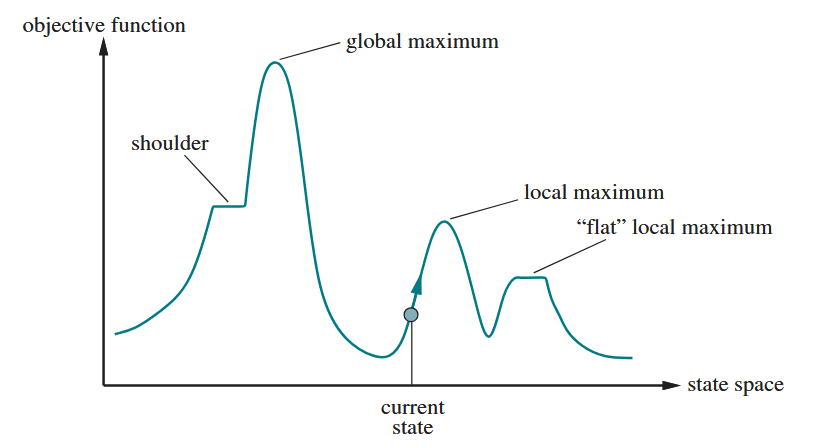

Let's make this with code!

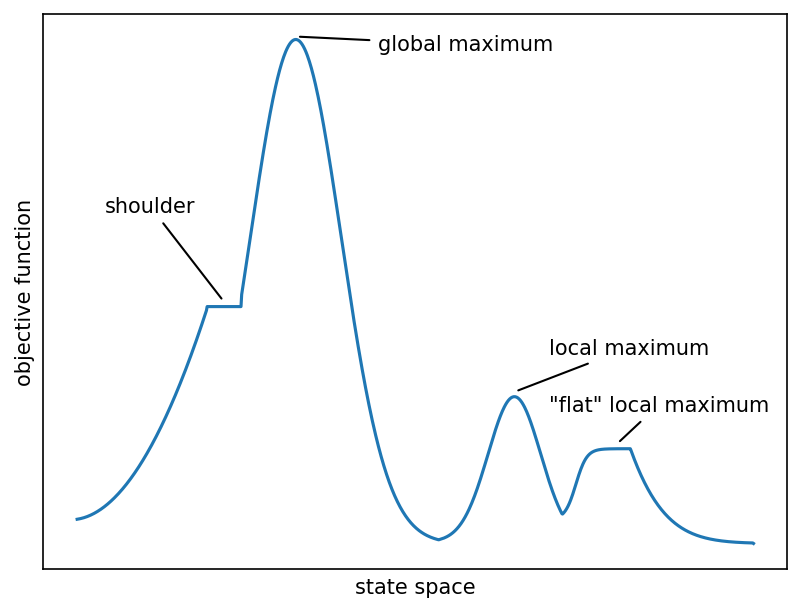

In [256]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Utility: probability mass function of normal distribution
def normal_pmf(x, mean, std_dev):
    return (1 / (math.sqrt(2 * math.pi * std_dev ** 2))) * (math.e ** -(((x - mean) ** 2) / 2 * (std_dev ** 2)))
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Set up plot
figure = plt.figure()
figure.set_dpi(150)
axes = figure.add_subplot()
axes.set_ylabel('objective function')
axes.set_xlabel('state space')

axes.set_xticks([])
axes.set_yticks([])

x = np.linspace(1, 100, 1000)
condlist = [
    (x >= 0)  & (x < 20),
    (x >= 20) & (x < 25),
    (x >= 25) & (x < 54),
    (x >= 54) & (x < 72),
    (x >= 72) & (x < 82),
    (x >= 82) & (x < 100)
]

funclist = [
    lambda x: ((x * 0.8) ** 2) / 11.5 + 2.5,
    lambda _: 25,
    lambda x: normal_pmf(x, 33, 0.15) * 20,
    lambda x: normal_pmf(x, 65, 0.26) * 10 + 0.15,
    lambda x: sigmoid((x - 74) * 1.25) * 7.5 + 2.5,
    lambda x: normal_pmf(x, 61.6, 0.1) * 20
]

y = np.piecewise(x, condlist, funclist)

axes.plot(x, y)

# Annotations
arrow_props = {'arrowstyle': '-'}
axes.annotate('shoulder', xy=(22.5, 25.5), xytext = (5, 35), arrowprops=arrow_props)
axes.annotate('global maximum', xy=(33, 53.5), xytext=(45, 52), arrowprops=arrow_props)
axes.annotate('local maximum', xy=(65, 16), xytext=(70, 20), arrowprops=arrow_props)
axes.annotate('"flat" local maximum', xy=(80, 10.5), xytext=(70, 14), arrowprops=arrow_props)


plt.show()

## 4.2: Local Search in Continuous Spaces
Resources:
* [3Blue1Brown -  From Newton’s method to Newton’s fractal (which Newton knew nothing about)](https://www.youtube.com/watch?v=-RdOwhmqP5s)
* [Khan Academy - The Hessian matrix | Multivariable calculus](https://www.youtube.com/watch?v=LbBcuZukCAw)